Laboratory exercise due to 24th of April 2024. 

Load the necessary libraries:

In [1]:
library(tidyverse)
library(dplyr)
library(geosphere)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


1) read the data and import in a data.frame or tibble structure

In [2]:
df2 <- read.csv("Data_CitiBike/JC-201902-citibike-tripdata.csv")
df3 <- read.csv("Data_CitiBike/JC-201903-citibike-tripdata.csv")
df4 <- read.csv("Data_CitiBike/JC-201904-citibike-tripdata.csv")
df5 <- read.csv("Data_CitiBike/JC-201905-citibike-tripdata.csv")
df6 <- read.csv("Data_CitiBike/JC-201906-citibike-tripdata.csv")

In [3]:
a <- nrow(df2)+nrow(df3)+nrow(df4)+nrow(df5)+nrow(df6)
a

[1] 150792

2) merge the five data frames in a unique structure

In [4]:
df <- rbind(df2, df3, df4, df5, df6)

In [5]:
nrow(df)
nrow(df) == a 

[1] 150792

[1] TRUE

3) check for missing data and remove it, if any

In [6]:
df <- na.omit(df)
nrow(df)

[1] 150792

As can be seen from the number of rows of the dataframe df printed above, since such number does not change, it means that no rows had missing data.

4.1) compute the average and the median trip duration in minutes

In [7]:
head(df)

,tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender
,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>
1,142,2019-02-01 15:35:02.0820,2019-02-01 15:37:24.1360,3183,Exchange Place,40.71625,-74.03346,3639,Harborside,40.71925,-74.03423,29677,Subscriber,1963,1
2,223,2019-02-01 17:00:46.8900,2019-02-01 17:04:30.5500,3183,Exchange Place,40.71625,-74.03346,3681,Grand St,40.71518,-74.03768,26234,Subscriber,1992,2
3,106,2019-02-01 17:08:01.3260,2019-02-01 17:09:47.4400,3183,Exchange Place,40.71625,-74.03346,3184,Paulus Hook,40.71415,-74.03355,29588,Subscriber,1960,1
4,370,2019-02-01 17:09:31.2100,2019-02-01 17:15:41.6550,3183,Exchange Place,40.71625,-74.03346,3211,Newark Ave,40.72153,-74.04630,29250,Subscriber,1976,1
5,315,2019-02-01 17:19:53.2490,2019-02-01 17:25:09.1400,3183,Exchange Place,40.71625,-74.03346,3273,Manila & 1st,40.72165,-74.04288,29586,Subscriber,1980,1
6,145,2019-02-01 17:32:53.2630,2019-02-01 17:35:18.7510,3183,Exchange Place,40.71625,-74.03346,3214,Essex Light Rail,40.71277,-74.03649,26153,Subscriber,1984,1


In [8]:
mean_trip <- mean(df$tripduration)
med_trip <- median(df$tripduration)
print(paste("Mean_trip trip duration:", mean_trip))
print(paste("Trip duration var_trip:", med_trip))

[1] "Mean_trip trip duration: 768.642766194493"
[1] "Trip duration var_trip: 341"


4.2) evaluate the minimum and maximum trip duration; does that sound like a reasonable value?

In [9]:
min_trip <- min(df$tripduration)
max_trip <- max(df$tripduration)
print(paste("Minimum trip duration:",min_trip))
print(paste("Maximum trip duration:",max_trip))

[1] "Minimum trip duration: 61"
[1] "Maximum trip duration: 1729020"


As can be seen from the results printed above, the maximum trip duration is not a reasonable value for a bike trip, therefore it can be labelled as an outlier. 

4.3) repeat the calculation of the average (and the median) trip duration by excluding trips longer than
3 hours. Next, evaluate the number of skimmed entries

In [10]:
new_mean<-function(x){
    new_x <- x[x < 10800]
    return(mean(new_x))
}

new_med<-function(x){
    new_x <- x[x < 10800]
    return(median(new_x))
}

In [11]:
length(df$tripduration)
length(df$tripduration[df$tripduration < 10800])

[1] 150792

[1] 150364

In [12]:
mean_trip2 <- new_mean(df$tripduration)
med_trip2 <- new_med(df$tripduration)
print(paste("Mean_trip trip duration:", mean_trip2))
print(paste("Trip duration var_trip:", med_trip2))

[1] "Mean_trip trip duration: 553.31404458514"
[1] "Trip duration var_trip: 340"


In [13]:
print(paste("Number of skimmed entries:",length(df$tripduration)-length(df$tripduration[df$tripduration < 10800])))

[1] "Number of skimmed entries: 428"


4.4) plot the distribution of trip duration after the skimming of the previous poin

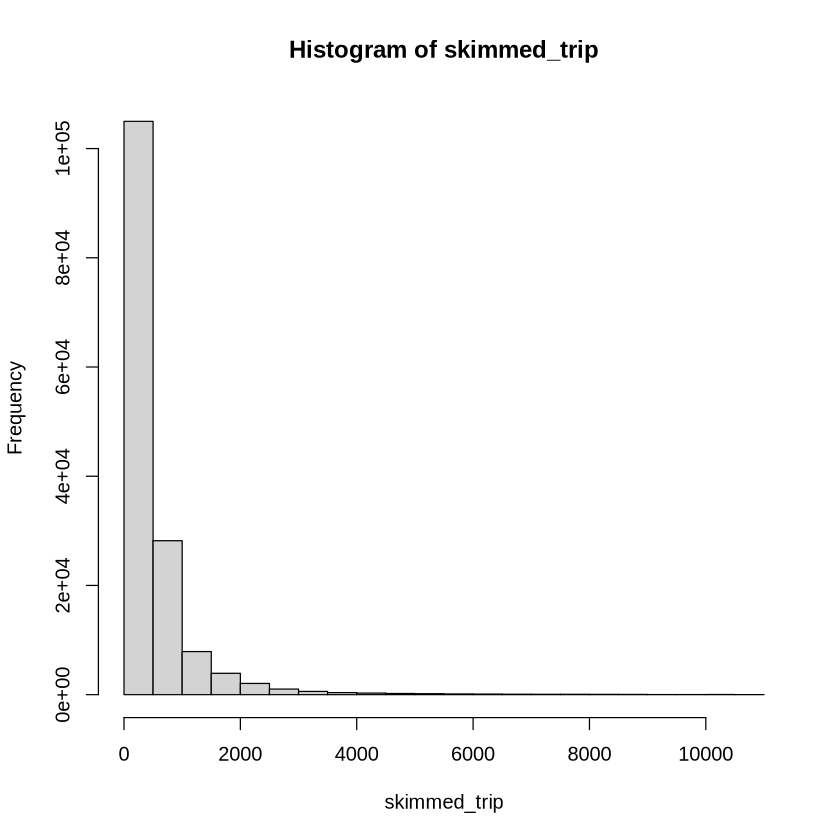

In [14]:
skimmed_trip <- df$tripduration[df$tripduration<10800]
hist(skimmed_trip)

5) Plot the monthly average trip duration

[1] "Mean for February : 605.339563695125"
[1] "Mean for March : 546.176353469457"
[1] "Mean for April : 713.995674007744"
[1] "Mean for May : 824.1199944652"
[1] "Mean for June : 973.68995688562"


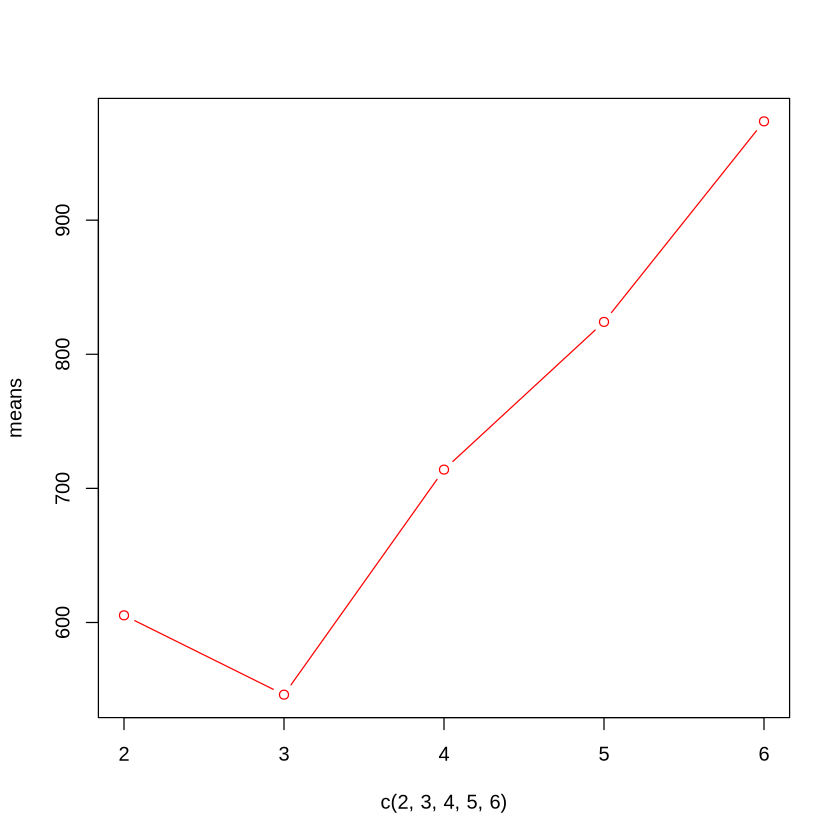

In [15]:
means<-c(mean(df2$tripduration),mean(df3$tripduration),mean(df4$tripduration),mean(df5$tripduration),mean(df6$tripduration))
month<-c("February","March","April","May","June")
plot(c(2,3,4,5,6),means,type='b',col='red')
for (i in 2:6){
    print(paste("Mean for",month[i-1],":",means[i-1]))
}

6.1)plot the number of rides per day

In [16]:
df$date <- substr(df$starttime,1,10)

In [17]:
rides_per_day <- df %>%
 group_by(date) %>%
 summarize(num_rides = n())

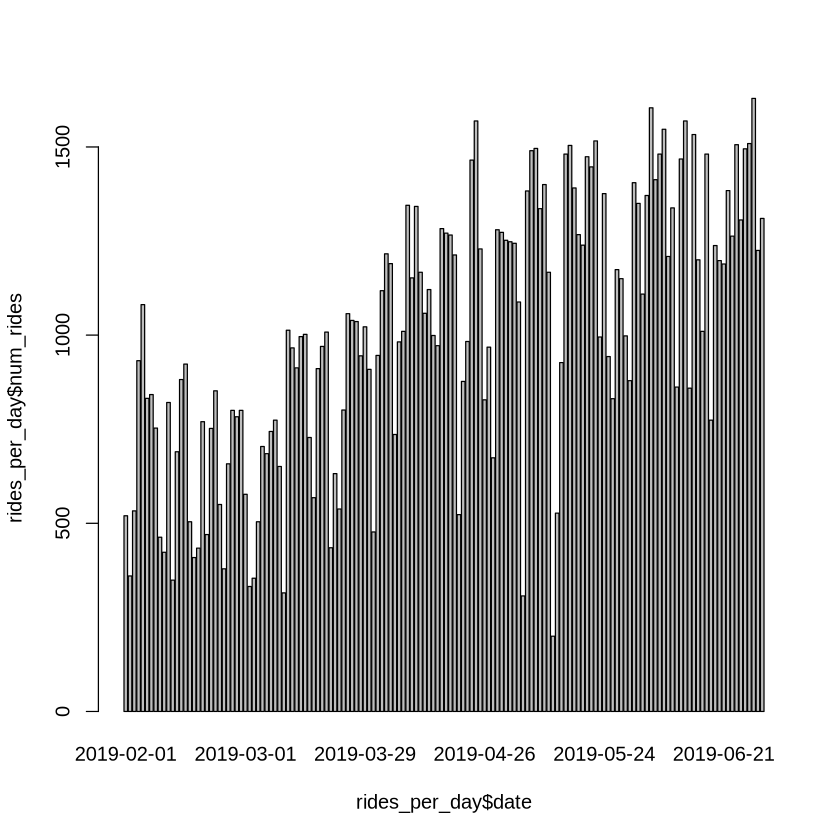

In [18]:
barplot(rides_per_day$num_rides ~ rides_per_day$date)

6.2) plot the hourly distribution on weekdays and on the weekends

In [19]:
df$hour <- substr(df$starttime,12,13)


In [20]:
df$weekday <- (((as.integer(substr(df$date,9,10)))%%7) %in% c(1,4,5,6,0))

In the cell above I've checked the remainder of the division by 7 of the date of each row and then determined if it was a weekday or not based on the fact that the date 2019/02/01 was a Friday.

In [21]:
rides_h_weekday <- df %>%
    filter(df$weekday) %>%
    group_by(hour) %>%
    summarize(num_rides = n())


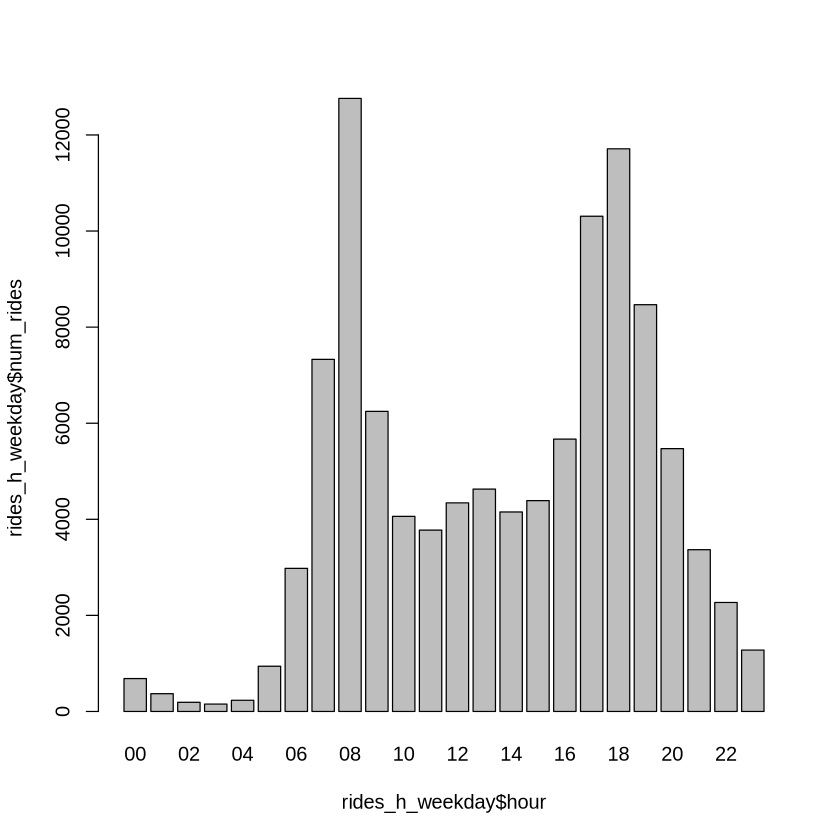

In [22]:
barplot(rides_h_weekday$num_rides ~ rides_h_weekday$hour)

In [23]:
rides_h_weekend <- df %>%
    filter(!df$weekday) %>%
    group_by(hour) %>%
    summarize(num_rides = n())

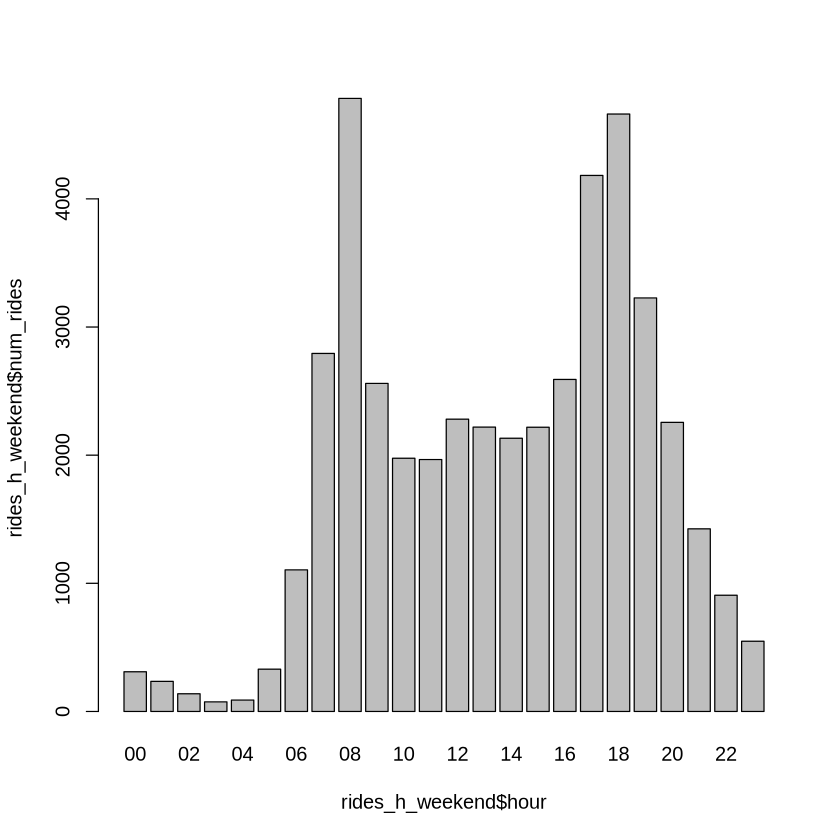

In [24]:
barplot(rides_h_weekend$num_rides ~ rides_h_weekend$hour)

6.3) plot again the average hourly distribution on weekdays but separating customer and subscriber users. 

In [25]:
head(rides_h_weekday)

hour,num_rides
<chr>,<int>
00,685
01,370
02,191
03,154
04,233
05,942


In [26]:
weekdays <- df %>%
    filter(df$weekday)

weekdays_cus <- weekdays %>%
    filter(weekdays$usertype == "Customer")

hour_cus <- weekdays_cus %>%
    group_by(hour) %>%
    summarize(n_rides = n())

weekdays_sub <- weekdays %>%
    filter(weekdays$usertype == "Subscriber")

hour_sub <- weekdays_sub %>%
    group_by(hour) %>%
    summarize(n_rides = n())

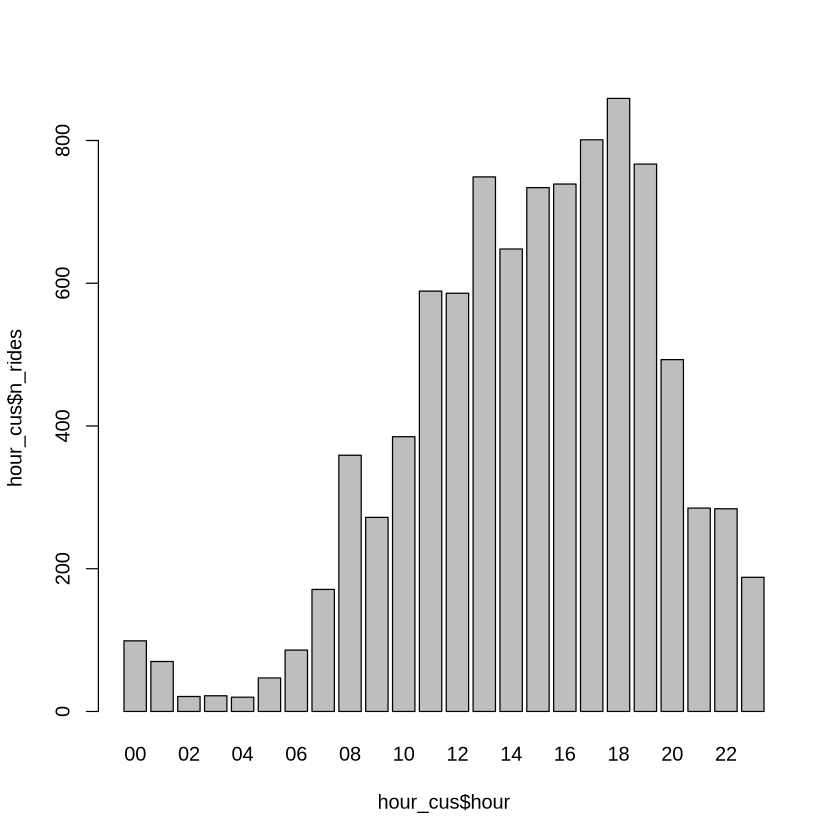

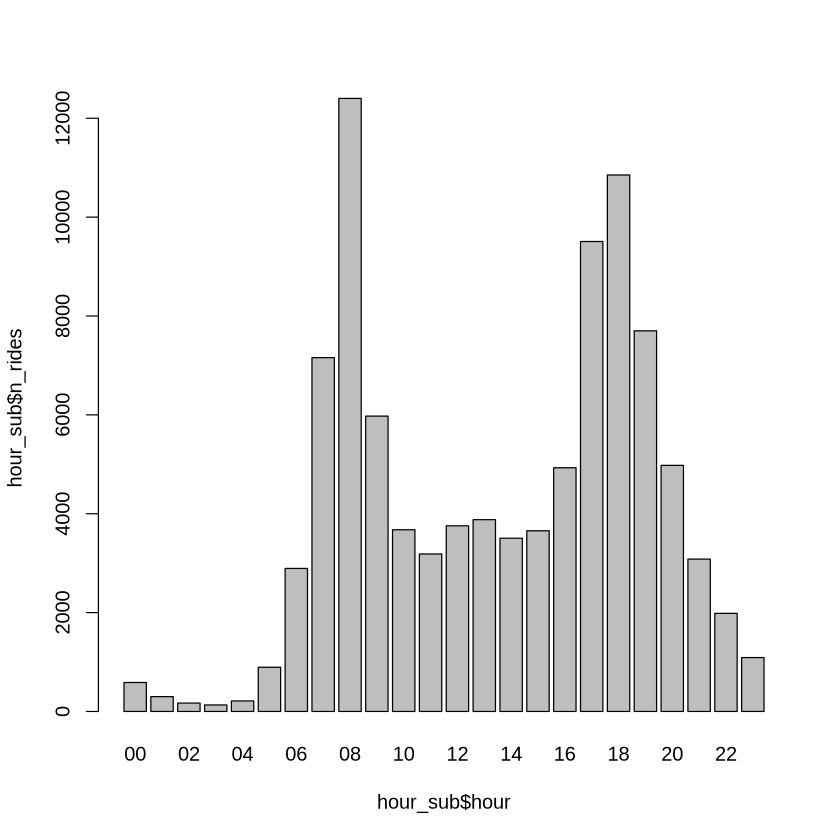

In [27]:
barplot(hour_cus$n_rides ~ hour_cus$hour)
barplot(hour_sub$n_rides ~ hour_sub$hour)

7.1) using the latitude and longitude information, evaluate the average speed (in km/h) of a user, discrding the triplasting longer than 1 hour.

In [28]:
library("geosphere")

In [29]:
av_speed <- function(p1,p2,t){
    return((distHaversine(p1,p2)/t)*3.6)
}

In [31]:
less1hour <- df %>%
    filter(tripduration < 3600)

start <- less1hour %>%
    select(start.station.longitude,start.station.latitude)

end <- less1hour %>%
    select(end.station.longitude,end.station.latitude)

less1hour$avg_speed <- av_speed(start,end,less1hour$tripduration)

7.2) plot the average speed as a function of route length for the following group of distances d <500 m,
500 m <d <1000 m, 1000 m <d <2000 m, 2000 m <d <3000 m, d >3000 m and discarding
trips longer than 1 hour

In [32]:
less1hour$route_length <- distHaversine(start,end)

Route length less than 500 m:

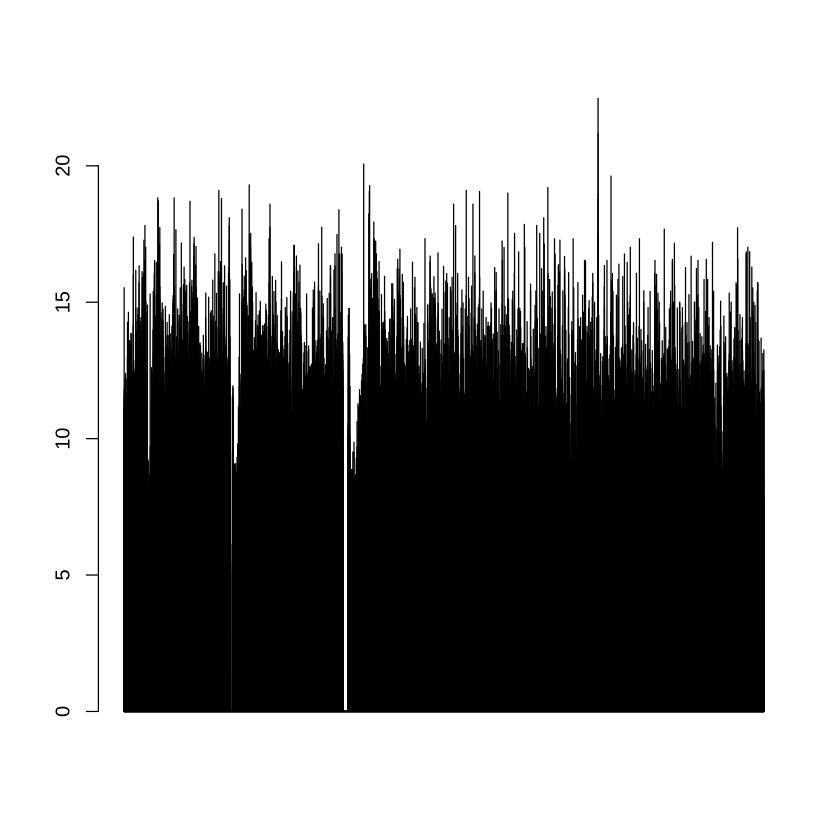

In [36]:

less500 <- less1hour %>%
    filter(route_length<500)

barplot(height = less500$avg_speed)